## Ejemplos de gráficos

En este cuaderno se muestran ejemplos de visualizaciones en base a los archivos computer_book, peliculas y videoconferencia adjuntos y en base al dataset titanic 

## Caso 1

Cargar datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("videoconferencia.csv")
dfpivoteado = df.pivot(index = "Día", columns = "Semana", values = "Horas")
dias_orden = ['Lunes', 'Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
dfpivoteado = dfpivoteado.reindex(dias_orden)

Visualización con la personalización paleta secuencial.

<Axes: xlabel='Semana', ylabel='Día'>

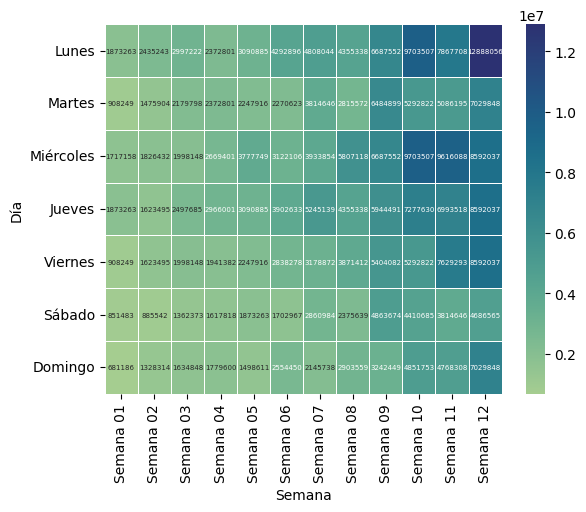

In [2]:
sns.heatmap(dfpivoteado, annot = True, fmt = "", annot_kws = {"size": 5}, cmap = "crest", linewidths = 0.5)

Visualización con personalización paleta divergente.

<Axes: xlabel='Semana', ylabel='Día'>

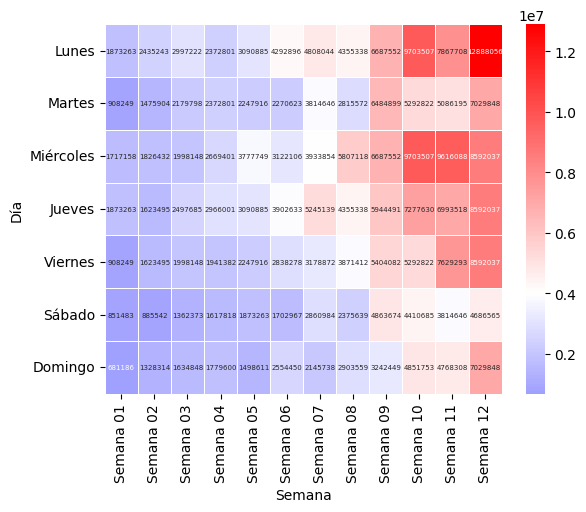

In [3]:
sns.heatmap(dfpivoteado, annot = True, fmt = "", annot_kws = {"size": 5}, cmap = "bwr", linewidths = 0.5, center = 4000000)

En este caso, la paleta mas efectiva es la secuencial, ya que los valores solo tienen una dirección

## Caso 2

Cargar datos

In [4]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head()
Survivors = df_titanic['alive'] == 'yes'
Not_survivors = df_titanic['alive'] == 'no'
df_survivors = df_titanic[Survivors]
df_not_survivors = df_titanic[Not_survivors]
clase_pasajero = df_titanic.groupby("class", observed=True).size()
clase_pasajero = clase_pasajero / clase_pasajero.sum()
clase_pasajero_survivor = df_survivors.groupby("class", observed=True).size()
clase_pasajero_survivor = clase_pasajero_survivor / clase_pasajero_survivor.sum()
clase_pasajero_not_survivor = df_not_survivors.groupby("class", observed=True).size()
clase_pasajero_not_survivor = clase_pasajero_not_survivor / clase_pasajero_not_survivor.sum()

Visualización torta

Text(0.5, 1.0, 'Pasajeros del Titanic por clase')

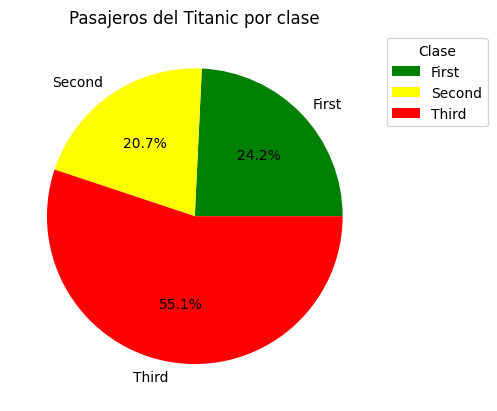

In [5]:
pie_chart = plt.pie(clase_pasajero, colors=['green', 'yellow', 'red'], autopct='%1.1f%%', labels=clase_pasajero.index)
plt.legend(pie_chart[0], clase_pasajero.index, title = "Clase", bbox_to_anchor = (1, 1))
plt.title("Pasajeros del Titanic por clase")

Visualización tortas

Text(0.5, 1.0, 'Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)')

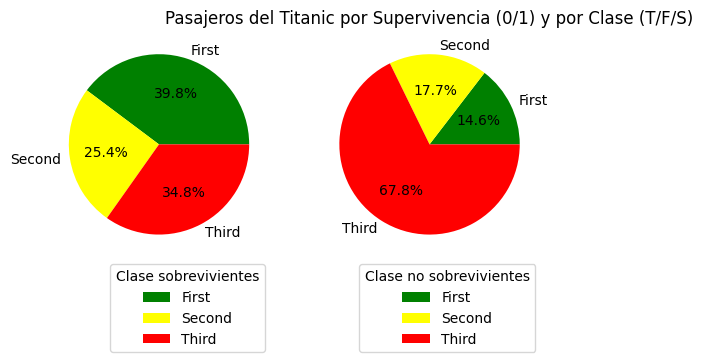

In [6]:
fig, charts = plt.subplots(1, 2)

charts[0].pie(clase_pasajero_survivor,  colors=['green', 'yellow', 'red'], autopct='%1.1f%%', labels=clase_pasajero_survivor.index)
charts[1].pie(clase_pasajero_not_survivor,  colors=['green', 'yellow', 'red'], autopct='%1.1f%%', labels=clase_pasajero_not_survivor.index)

charts[0].legend(clase_pasajero_survivor.index, title = "Clase sobrevivientes", bbox_to_anchor = (1, 0))
charts[1].legend(clase_pasajero_not_survivor.index, title = "Clase no sobrevivientes", bbox_to_anchor = (1, 0))

plt.title("Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)")

Al respecto podemos señalar que:
La clase mas común de los sobrevivientes es "First"
La clase más común en los no sobrevivientes es "Third"
Para comparar múltiples categorías es más efectivo un gráfico de barras que uno de torta, ya que en este último se complica distinguir entre las proporiones debido a la dificultad humana para distinguir angulos y calcular áreas.

## Caso 3

Cargar datos

In [7]:
df_peliculas = pd.read_csv("peliculas.csv")

Visualización con personalizaciones

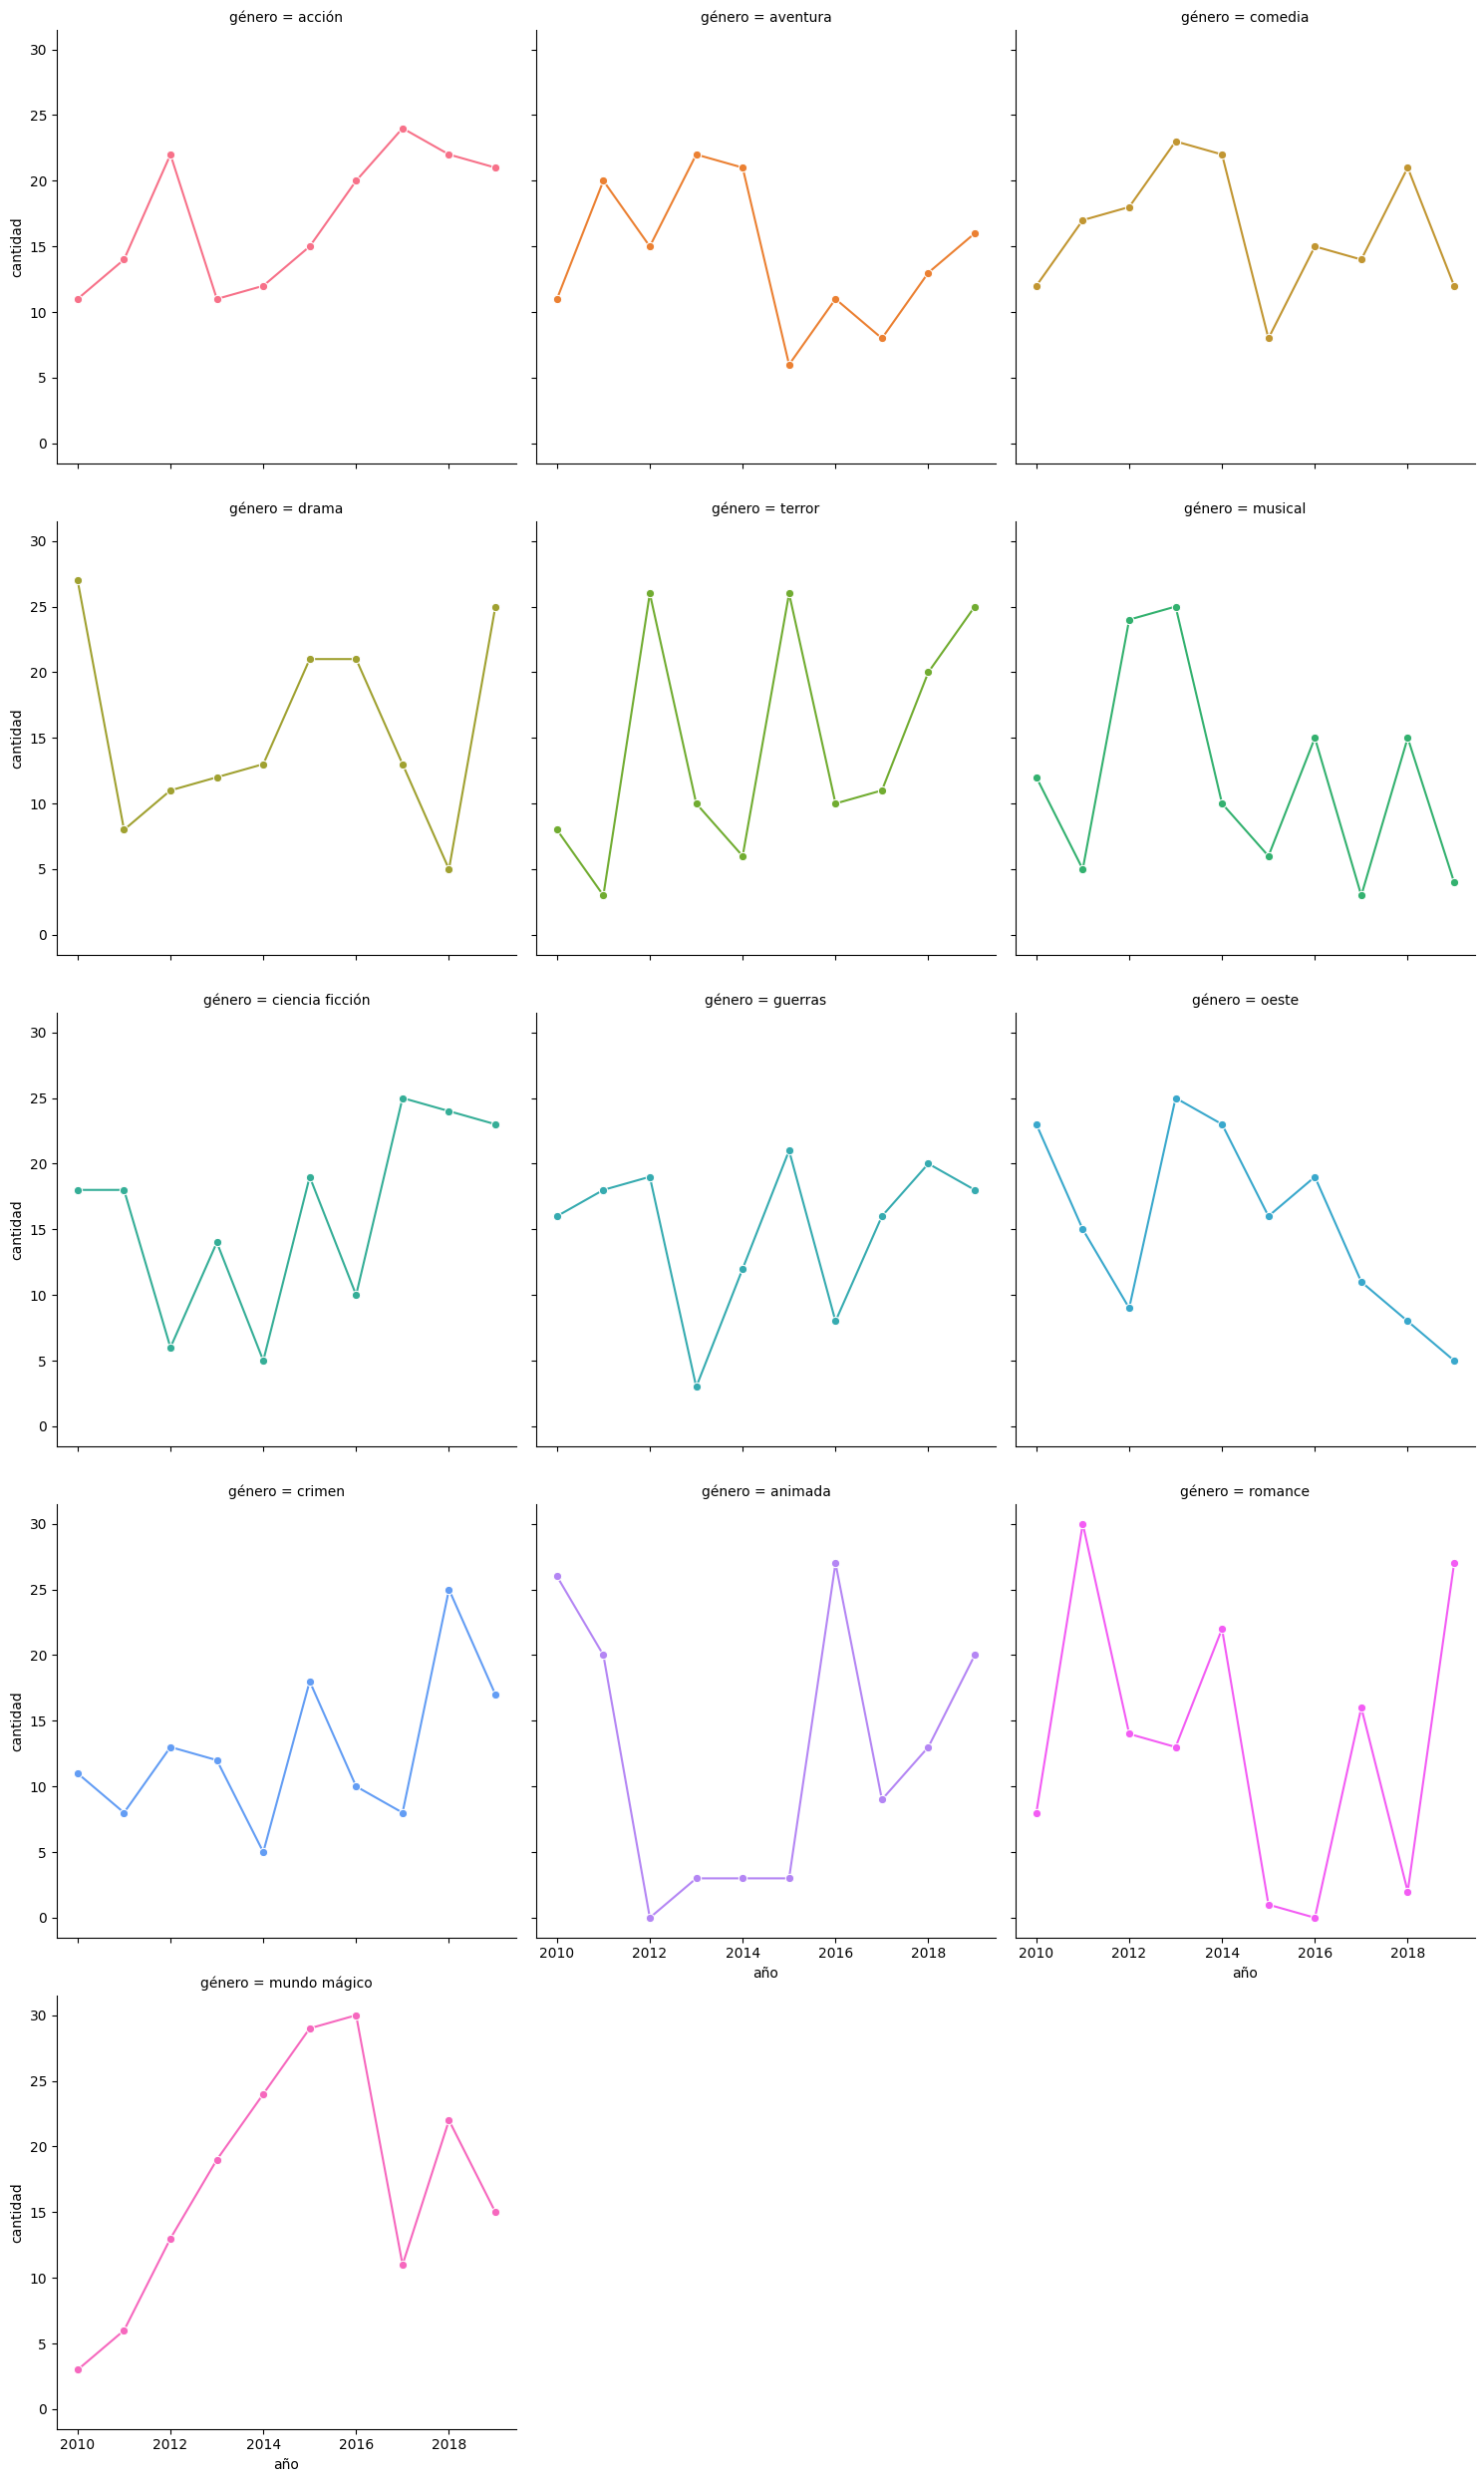

In [8]:
grid1 = sns.FacetGrid(data = df_peliculas, col = "género", col_wrap = 3, hue = "género", height=5)
grid1.map(sns.lineplot, "año", "cantidad", marker = "o")

Visualización con personalizaciones

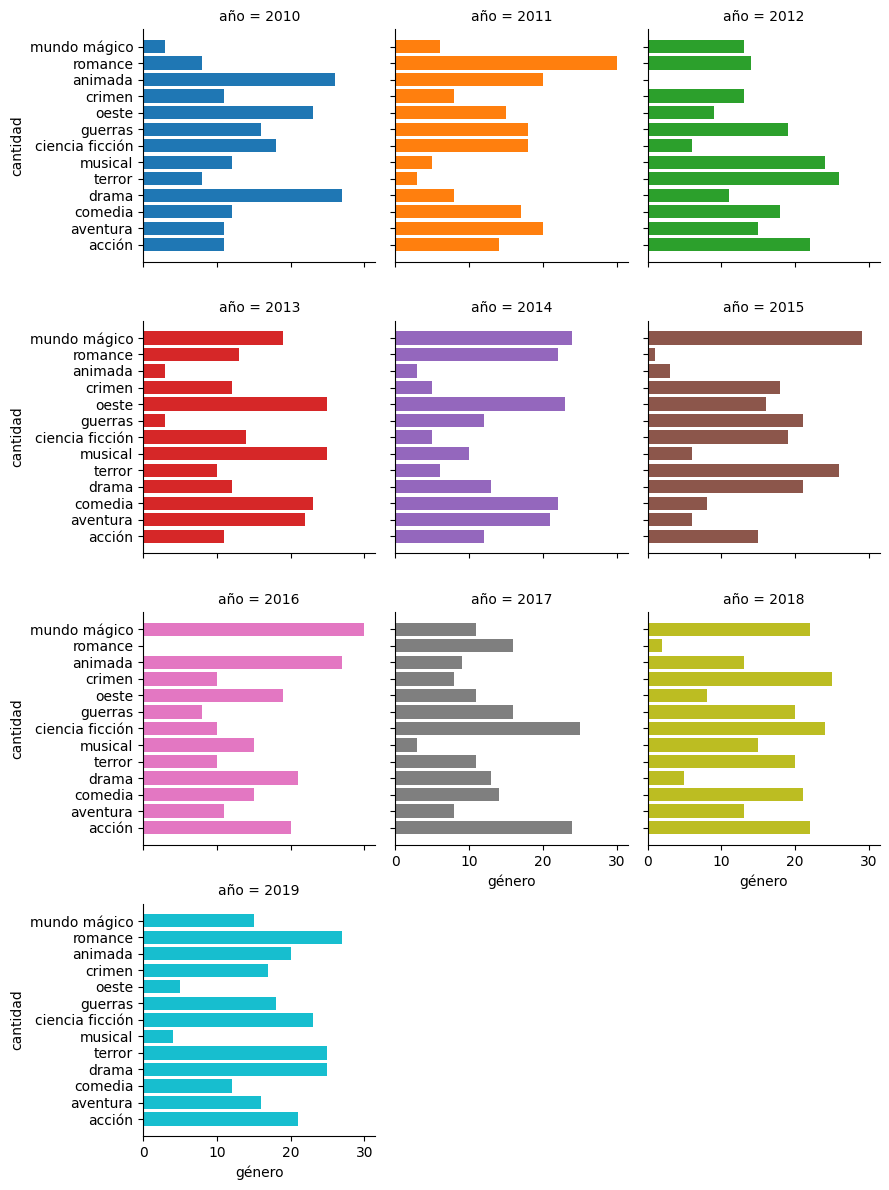

In [9]:
grid2 = sns.FacetGrid(data = df_peliculas, col = "año", col_wrap = 3, hue = "año")
grid2.map(plt.barh, "género", "cantidad")

Al respecto podemos señalar que:
El gráfico de barras horizontales permite visualizar de manera clara los géneros de películas mas estrenadas por año, por ejemplo, en 2019 la mayor cantidad de péliculas estrenadas fueron de romance.
El gráfico de lineas permite visualizar de manera clara la tendencia en los años de la cantidad de estrenos por cada género, por ejemplo,las películas del oeste presentan una baja sostenida en la cantidad de estrenos desde el 2016, al contrario, las peliculas de terror muestran un aumento sostenido de estrenos desde el 2016 en adelante. 